# Bank Fraud Detection
Authors: Alec Beland, Owen Milke, Owen Davis, Kane, Issac

## Introduction

https://www.kaggle.com/datasets/marusagar/bank-transaction-fraud-detection/data

This dataset is a collection of banking transactions from LOL Bank Pvt. Ltd. that we found on Kaggle. It will be used to detect fradulent activities in said transactions.

The dataset has many parameters, each of which will be analyzed, explored, and correlated with the possibility of fraud based on said transaction. All parameters are self explanatory, and include customer demographics (gender, age, state, city, etc.), transaction specifiers (transaction date, time, amount, etc.), and specific banking specifiers (balance, bank_branch, etc.), along with noting if the current transaction was fraudulent or not (1 or 0), with Is_Fraud.

Some of our inital motivating questions include:
- Which variables are most correlated to bank fraud?
- How accurately can we predict fraudulent activity with machine learning?
- When is fraudulent activity most likely to occur? Are there certain merchants or devices more likely to be targeted?


## Data Cleaning

In [42]:
import pandas as pd

# Read in full csv
fraud_df = pd.read_csv("Bank_Transaction_Fraud_Detection.csv")

# Drop unnecessary columns
fraud_df = fraud_df.drop(
                        ['Customer_ID', 'Customer_Name', 'Transaction_ID',
                         'Merchant_ID', 'Transaction_Description', 'Customer_Email', 
                         'Customer_Contact', 'Transaction_Currency'], 
                        axis=1)

# Switch Is_Fraud's location to first column
is_fraud = fraud_df.pop('Is_Fraud')
fraud_df.insert(0, 'Is_Fraud', is_fraud)

# Standardize Date
fraud_df['Transaction_Date'] = pd.to_datetime(fraud_df['Transaction_Date'], dayfirst=True, errors='coerce').dt.date
# Standardize Time
fraud_df['Transaction_Time'] = pd.to_datetime(fraud_df['Transaction_Time'], format='%H:%M:%S', errors='coerce').dt.time

# Make into new csv
fraud_df.to_csv('Cleaned_Fraud.csv', index=False)

## Exploratory Analysis

In [43]:
# Loading Cleaned Data Set and Imports
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')
df = pd.read_csv("Cleaned_Fraud.csv")

## Overall Amount of Bank Fraud

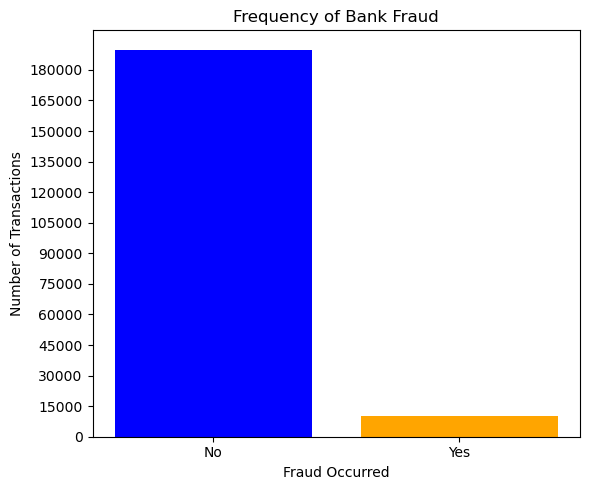

In [44]:
fraud_counts = df['Is_Fraud'].value_counts().sort_index()
fraud_labels = {0: 'No', 1: 'Yes'}
labels = [fraud_labels.get(i, str(i)) for i in range(len(fraud_counts))]

plt.figure(figsize=(6, 5))
plt.bar(labels, fraud_counts.values, color=['blue', 'orange'])

plt.title('Frequency of Bank Fraud')
plt.xlabel('Fraud Occurred')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, fraud_counts.max() + 1, 15000))
plt.ylim(bottom=0)
plt.tight_layout()

plt.show()

### Fraudrate by Age Group

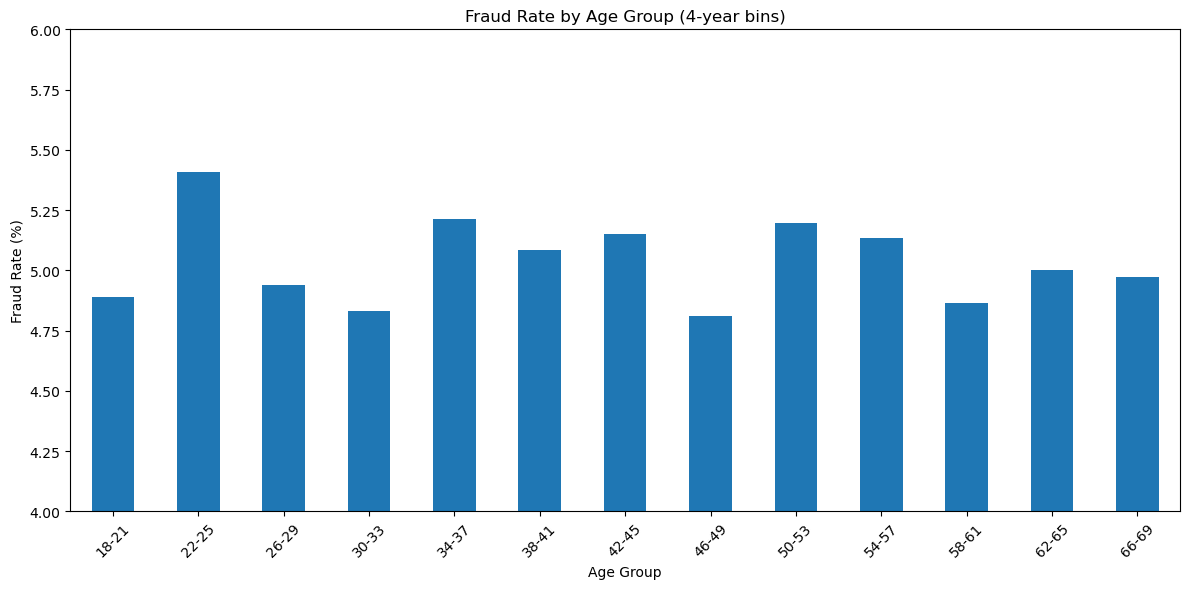

In [45]:
# Create 4-year bins from 18 to 70
bins = list(range(18, 71, 4))  # 18, 22, 26, ..., 66, 70
labels = [f'{i}-{i+3}' for i in bins[:-1]]

# Cut the Age column into those bins
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Calculate fraud rate per age group
fraud_rate_by_age = df.groupby('Age_Group')['Is_Fraud'].mean() * 100  # convert to percentage

# Plot the fraud rate
plt.figure(figsize=(12, 6))
fraud_rate_by_age.plot(kind='bar')

plt.title('Fraud Rate by Age Group (4-year bins)')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('Age Group')
plt.ylim(4,6)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Fraud Rate by Age Group Summary

This bar chart visualizes the percentage of fraudulent transactions across 4-year age intervals:

- Fraud rates generally range between **4.5% and 5.5%**.
- Slight peaks are seen in the **22–25**, **34–37**, and **50–53** age groups.
- No strong correlation is observed between age and fraud rate, suggesting that **age alone may not be a reliable predictor of fraud**.



### Fraud by State (Ordered by Income)

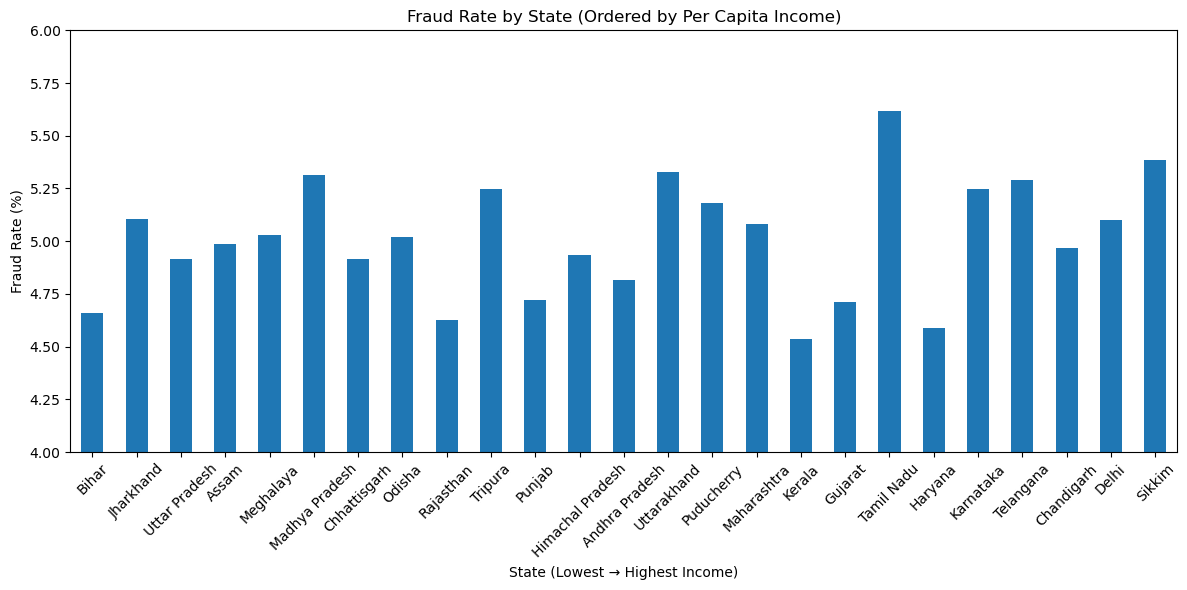

In [46]:
# Manually create a dictionary of per capita income by state (₹)
income_data = {
    'Bihar': 60337,
    'Jharkhand': 105274,
    'Uttar Pradesh': 114514,
    'Assam': 135787,
    'Meghalaya': 136948,
    'Jammu and Kashmir': 142138,
    'Madhya Pradesh': 142565,
    'Chhattisgarh': 147361,
    'Odisha': 163101,
    'Rajasthan': 167964,
    'Tripura': 177723,
    'Punjab': 196505,
    'Himachal Pradesh': 235199,
    'Andhra Pradesh': 242479,
    'Uttarakhand': 260201,
    'Puducherry': 262166,
    'Maharashtra': 277603,
    'Kerala': 281001,
    'Gujarat': 297722,
    'Tamil Nadu': 315220,
    'Haryana': 325759,
    'Karnataka': 332926,
    'Telangana': 356564,
    'Chandigarh': 399654,
    'Delhi': 461910,
    'Sikkim': 587743,
}

# Convert to DataFrame
income_df = pd.DataFrame.from_dict(income_data, orient='index', columns=['Per_Capita_Income'])

# Join with fraud rate by state
fraud_rate_by_state = df.groupby('State')['Is_Fraud'].mean() * 100  # percentage
fraud_and_income = pd.concat([fraud_rate_by_state, income_df], axis=1).dropna()

# Sort by income (poorest to richest)
fraud_and_income_sorted = fraud_and_income.sort_values(by='Per_Capita_Income')

# Plot fraud rate by state ordered by income
plt.figure(figsize=(12, 6))
fraud_and_income_sorted['Is_Fraud'].plot(kind='bar')

plt.title('Fraud Rate by State (Ordered by Per Capita Income)')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('State (Lowest → Highest Income)')
plt.ylim(4, 6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Fraud Rate by State (Ordered by Per Capita Income) Summary

This bar chart shows the fraud rate by state, ordered from **lowest to highest per capita income**:

- States like **Sikkim**, **Delhi**, and **Tamil Nadu** show some of the **highest fraud rates**, despite having higher income levels.
- States like **Bihar**, **Odisha**, and **Kerala** show **lower fraud rates**, even with lower average incomes.
- Overall, there is **no clear relationship between income level and fraud rate**, suggesting that **factors beyond economic status** may be driving fraud trends.



### Fraud Rate by Gender 

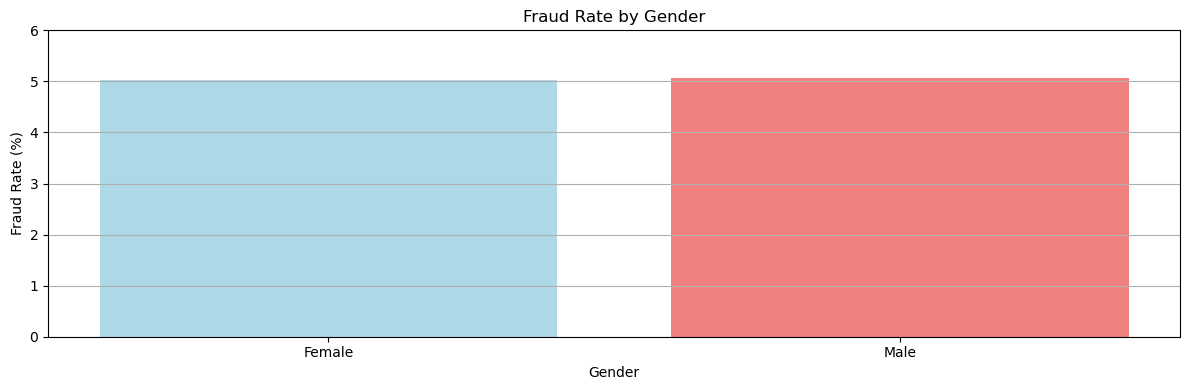

In [47]:
# Calculate fraud rate by gender
fraud_by_gender = df.groupby("Gender")["Is_Fraud"].mean() * 100  # convert to %

# Plot
plt.figure(figsize=(12, 4))
plt.bar(fraud_by_gender.index, fraud_by_gender.values, color=["lightblue", "lightcoral"])
plt.title("Fraud Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Fraud Rate (%)")
plt.ylim(0, 6)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


#### Fraud Rate by Gender Summary

This bar chart displays the percentage of fraudulent transactions for each gender.

- The fraud rate is nearly identical between **females** and **males**, both around **5%**.
- Based on the second chart (transaction count by gender), the **total number of transactions is roughly the same** for both genders.
- This suggests that **gender does not appear to be a significant factor** in predicting fraud rate within this dataset.


### Percentage of Fraud by Transaction Type

<Figure size 800x600 with 0 Axes>

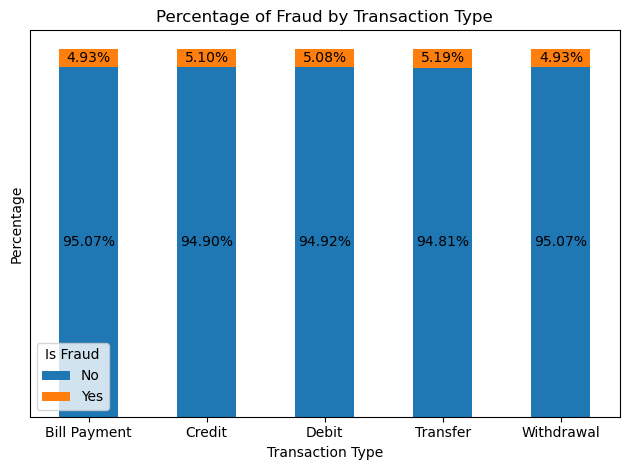

In [48]:
fraud_labels = {0: 'No', 1: 'Yes'}
plt.figure(figsize=(8, 6))
tx_counts = (df.assign(Is_Fraud=lambda x: x['Is_Fraud'].map(fraud_labels))
             .groupby(['Transaction_Type', 'Is_Fraud']).size().unstack(fill_value=0))
tx_pct = tx_counts.div(tx_counts.sum(axis=1), axis=0)
ax = tx_pct.plot.bar(
    stacked=True,
    title="Percentage of Fraud by Transaction Type",
    ylabel='Percentage',
    xlabel='Transaction Type',
    rot=0,
)
for container in ax.containers:
    ax.bar_label(container, 
                labels=[f'{x:.2%}' if x > 0.01 else '' for x in container.datavalues],
                label_type='center',
                fontsize=10)
ax.legend(title="Is Fraud")
ax.set_yticks([])
plt.tight_layout()
plt.show()

#### Summary:
The most likely transaction type to be fraudulent is a balance transfer, however, being only 0.26% more likely than the least likely fraud methods of bill payments and withdrawals, transaction type may not be an effective field for predicting fraud.

### Fraud Count by Merchant Category

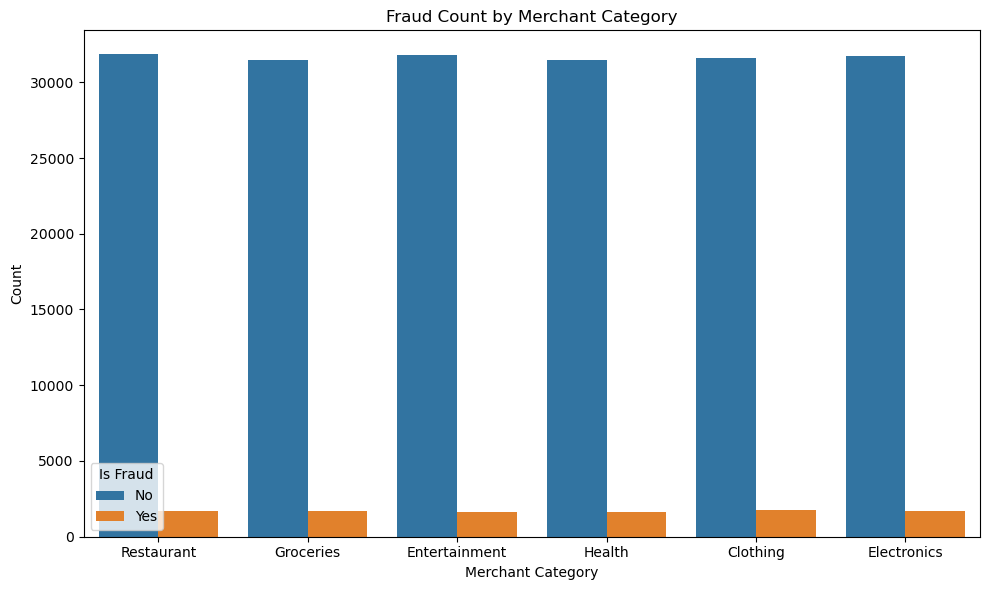

In [49]:
fraud_labels = {0: 'No', 1: 'Yes'}
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df.assign(Is_Fraud=lambda x: x['Is_Fraud'].map(fraud_labels)),
    x="Merchant_Category",
    hue="Is_Fraud"
)
ax.set_title("Fraud Count by Merchant Category")
ax.set_xlabel('Merchant Category')
ax.set_ylabel('Count')
ax.tick_params(axis='x')
ax.legend(title="Is Fraud", loc='lower left')
plt.tight_layout()
plt.show()

#### Summary:
Overall fraud counts for each recorded merchant category seem to be largely the same, making the field unreliable in predicting fraud.

### Account Balance Distribution by Fraud

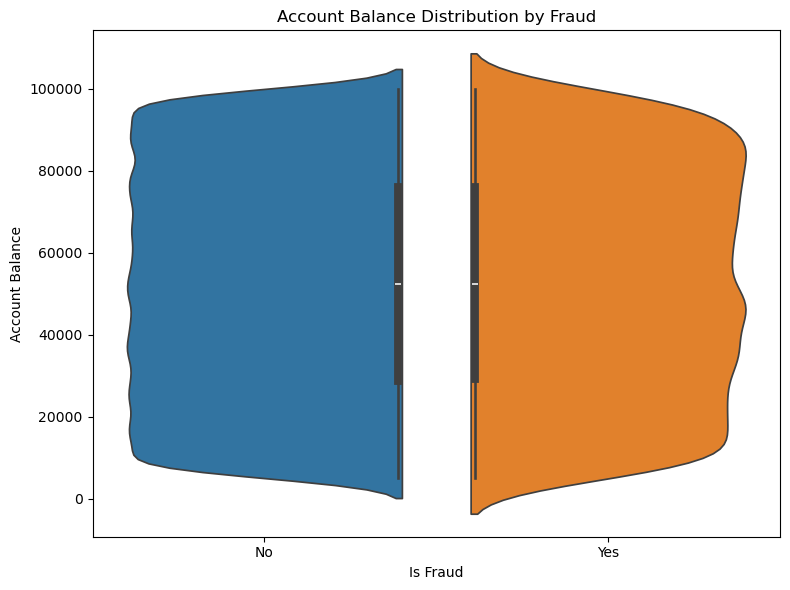

In [50]:
fraud_labels = {0: 'No', 1: 'Yes'}
plt.figure(figsize=(8, 6))
ax = sns.violinplot(
    data=df.assign(Is_Fraud=lambda x: x['Is_Fraud'].map(fraud_labels)),
    x="Is_Fraud",
    y="Account_Balance",
    hue="Is_Fraud",
    split=True,
    legend=False
)
ax.set_title("Account Balance Distribution by Fraud")
ax.set_xlabel('Is Fraud')
ax.set_ylabel('Account Balance')
plt.tight_layout()
plt.show()

#### Summary:
Confirmed cases of fraud seem to cover more of the extremes of account balance, including reported fraud at a \\$0 balance and a \\$100,000 balance. Reported fraud also seems slightly more weighted to balances under \\$60,000, which could prove usefull in predicting possible fraud.

### Transaction Time vs. Fraud Rate
##### *Is the time of the transaction related to the likelihood of a particular transaction being fraudlent?*

Mean fraud rate: 5.0443%
Standard deviation: 0.2005%
Variance: 0.000004
Max–Min spread: 0.6528%


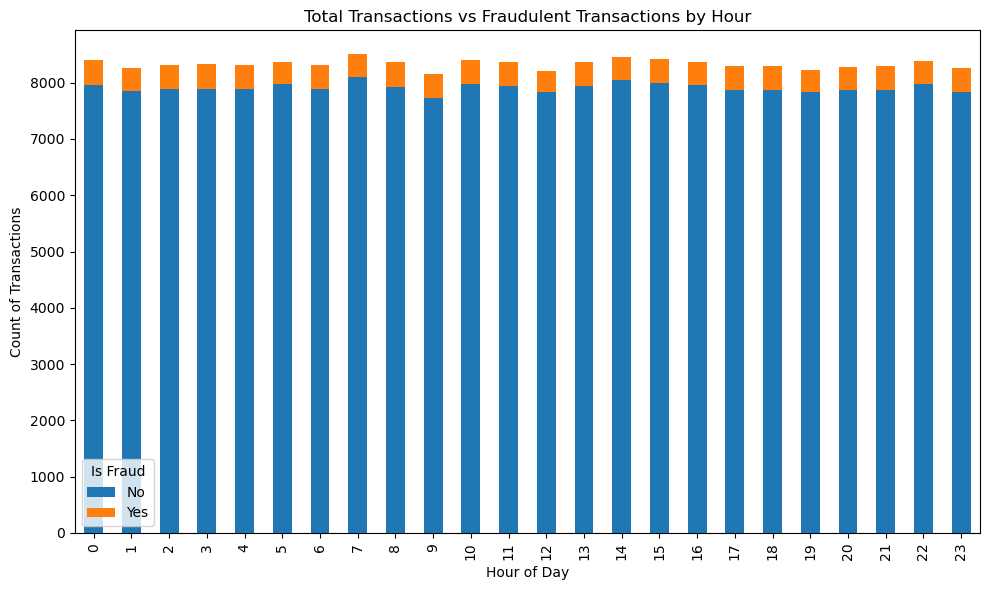

In [51]:
from Exploratory.trans_date_time_amount_balance_exploratory import transform_features
import pandas as pd
CLEANED: pd.DataFrame = pd.read_csv('Cleaned_Fraud.csv')
CLEANED = transform_features(df=CLEANED)
fraud_by_transaction_time = CLEANED.groupby(['Hour', 'Is_Fraud']).size().unstack(fill_value=0)  
fraud_by_transaction_time.plot(
    kind='bar', 
    stacked=True,
    figsize=(10, 6)
)

fraud_counts = fraud_by_transaction_time['Yes']
total_counts = fraud_by_transaction_time.sum(axis=1)
fraud_rate = fraud_counts / total_counts

mean_rate = fraud_rate.mean()
std_rate = fraud_rate.std()
var_rate = fraud_rate.var()
rate_range = fraud_rate.max() - fraud_rate.min()

print(f"Mean fraud rate: {mean_rate:.4%}")
print(f"Standard deviation: {std_rate:.4%}")
print(f"Variance: {var_rate:.6f}")
print(f"Max–Min spread: {rate_range:.4%}")
plt.title("Total Transactions vs Fraudulent Transactions by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Count of Transactions")
plt.legend(title="Is Fraud")
plt.tight_layout()


#### Summary
We can see that the proportion of fraudulent transactions changes minimally hour-to-hour, indicating that the hour of the day alone is not a useful indicator to tell us whether or not any given transaction is likely to be fraudulent.  
Additionally:  
- The variance between hours is so low, which tells us there aren't any unusually large jumps in fraudulent transactions hour to hour.
- The standard deviation of 0.200% tells us most hours fall within 4.8443% of transactions being fraudulent, and 5.2443% being fraudulent; not a large deviation from the mean.
- The min-max spread of 0.6528% tells us that even the largest swing between hours is less than a percentage point difference in fraud rate.

### Transaction Day vs. Fraudulence
##### *Is the date of the transaction related to the likelihood of a particular transaction being fraudlent?*

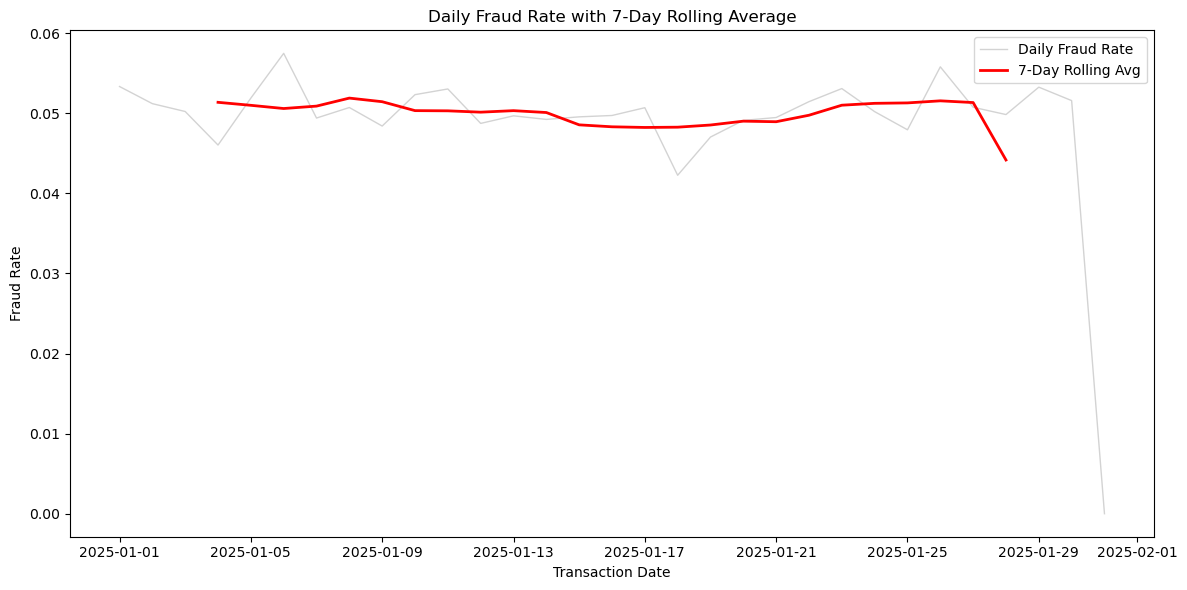

In [52]:
daily_summary = CLEANED.groupby('Transaction_Date').agg(
    total_transactions=('Transaction_Date', 'count'),
    fraud_transactions=('Is_Fraud', lambda x: (x == 'Yes').sum())
).reset_index()
daily_summary['fraud_rate'] = (
    daily_summary['fraud_transactions'] 
    / daily_summary['total_transactions']
)

daily_summary = daily_summary[daily_summary['total_transactions'] > 0]

daily_summary['fraud_rate_7d'] = (
    daily_summary['fraud_rate']
    .rolling(window=7, center=True)
    .mean()
)

plt.figure(figsize=(12, 6))

# raw daily rate in light grey
sns.lineplot(
    data=daily_summary,
    x='Transaction_Date',
    y='fraud_rate',
    color='lightgray',
    linewidth=1,
    label='Daily Fraud Rate',
    marker=None
)

# smoothed 7-day average in red
sns.lineplot(
    data=daily_summary,
    x='Transaction_Date',
    y='fraud_rate_7d',
    color='red',
    linewidth=2,
    label='7-Day Rolling Avg'
)

plt.xlabel("Transaction Date")
plt.ylabel("Fraud Rate")
plt.title("Daily Fraud Rate with 7-Day Rolling Average")
plt.legend()
plt.tight_layout()
plt.show()

#### Summary
The daily fraud rate (light gray) varies around 5 percent throughout January, with no sustained spikes or drops on any particular days. The weekly day rolling average (red) smooths out the noise and stays in a tight band, from about 4.8% in the middle of January to roughly 5.2% at the end, only minor, short-lived dips and recoveries. Overall, there’s no clear upward or downward trend in fraud rate over time, telling us that the calendar date by itself gives us little predictive power for identifying fraudulent transactions.


### Transaction Amount vs Fraudulence
##### *Is the transaction amount related to the likelihood of a particular transaction being fraudlent?*

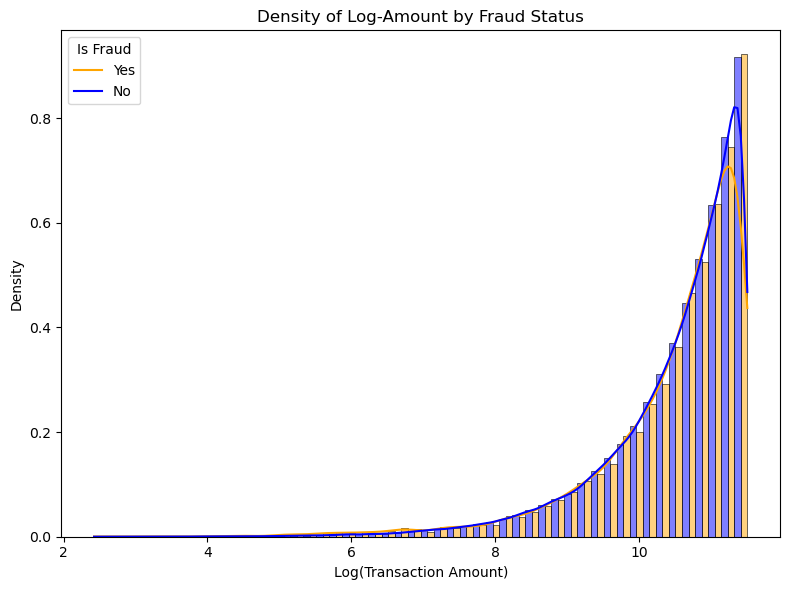

In [63]:
import numpy as np


df = CLEANED.copy()
df['LogAmt'] = np.log1p(df['Transaction_Amount'])

plt.figure(figsize=(8,6))
sns.histplot(
    data=df,
    x='LogAmt',
    hue='Is_Fraud',
    bins=50,
    stat='density',       
    common_norm=False,     
    kde=True,              
    alpha=0.5,
    palette={'No': 'blue', 'Yes': 'orange'},
    multiple='dodge'

)
plt.xlabel('Log(Transaction Amount)')
plt.ylabel('Density')
plt.title('Density of Log-Amount by Fraud Status')
plt.legend(title='Is Fraud', labels=['Yes','No'])
plt.tight_layout()
plt.show()

#### Summary
Fraud and non-fraud transaction sizes (on a log scale) have almost identical density curves for the bulk of amounts, diverging only in the extreme high tail where fraud is slightly more common. This shows us that amount alone provides only a weak signal except for the very largest transactions.

### Transaction Time & Amount vs Fraudulence
#### *Are the features 'transaction time' and 'transaction amount', when used together, indicative of any trend related to fraud?*

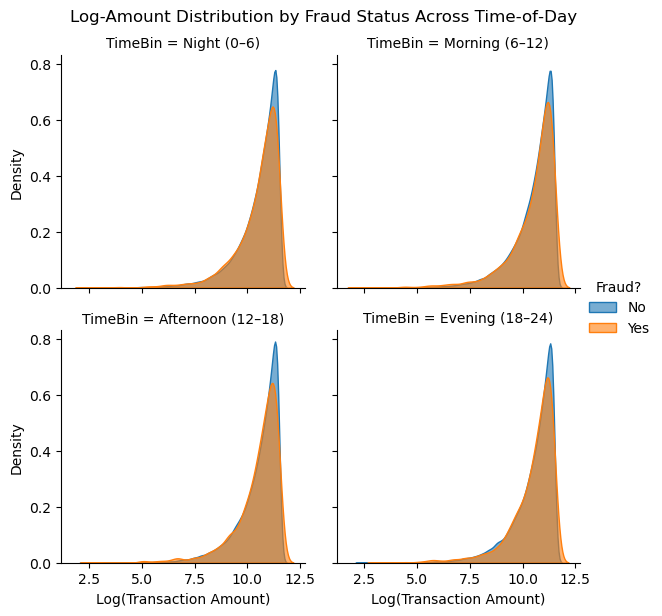

In [59]:
import numpy as np

df = pd.read_csv('Cleaned_Fraud.csv', parse_dates=['Transaction_Date'])
# log‐amount
df['LogAmt'] = np.log1p(df['Transaction_Amount'])
# hour as integer
df['Hour']   = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S').dt.hour

bins = [0, 6, 12, 18, 24]
labels = ['Night (0–6)','Morning (6–12)','Afternoon (12–18)','Evening (18–24)']
df['TimeBin'] = pd.cut(df['Hour'], bins=bins, labels=labels, right=False)
df['FraudLabel'] = df['Is_Fraud'].map({0: 'No', 1: 'Yes'})

g = sns.FacetGrid(
    df, 
    col='TimeBin', 
    hue='FraudLabel', 
    sharex=True, 
    sharey=True, 
    col_wrap=2, 
    height=3
)
g.map(sns.kdeplot, 'LogAmt', fill=True, common_norm=False, alpha=0.6)
g.add_legend(title='Fraud?')
g.set_axis_labels('Log(Transaction Amount)', 'Density')
g.fig.suptitle('Log-Amount Distribution by Fraud Status Across Time‐of‐Day', y=1.02)
plt.show()


#### Summary
The chart above plots the density of fraudulent and legitimate transactions based on the log of the transaction amount. It incorporates the time of day as well, seperating the times into four quartiles to see if the density distributions vary depending on the time of the transaction.   

Across all four time‐of‐day bins, the logged transaction amount distributions for fraud vs. non-fraud almost perfectly overlap. Fraud only edges out in the extreme tail. This pattern is consistent at night, morning, afternoon, and evening. So, transaction amount seems only to be a very weak signal (in the far tail) and time of day isn't really indicative of the likelihood of a transaction being fraudulent.

### Account Balance & Transaction Amount vs Fraudulence
#### *Does the proportion of the balance drained on a transaction indicate anything about the likelihood of a transaction being fraudulent?*

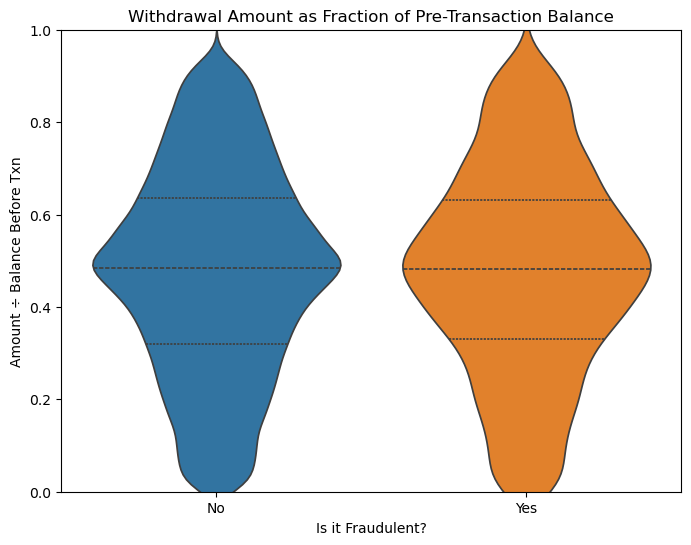

In [60]:
df2 = CLEANED.copy()

# for withdrawals/transfers, the new balance = old_balance – amount
# so old_balance = new_balance + amount
mask_w = df2['Transaction_Type'].isin(['Withdrawal','Transfer'])
df2.loc[mask_w,'Bal_Pre'] = df2.loc[mask_w,'Account_Balance'] + df2.loc[mask_w, 'Transaction_Amount']

mask_d = df2['Transaction_Type']=='Deposit'
df2.loc[mask_d, 'Bal_Pre'] = df2.loc[mask_d,'Account_Balance'] - df2.loc[mask_d, 'Transaction_Amount']
df2['Amt_to_PreBal'] = df2['Transaction_Amount'] / (df2['Bal_Pre'] + 1e-6)
plt.figure(figsize=(8,6))
sns.violinplot(
    data=df2, 
    x='Is_Fraud', 
    y='Amt_to_PreBal',
    inner='quartile',
    scale='width',
    hue='Is_Fraud'
)
plt.ylim(0,1)   
plt.title('Withdrawal Amount as Fraction of Pre-Transaction Balance')
plt.ylabel('Amount ÷ Balance Before Txn')
plt.xlabel('Is it Fraudulent?')
plt.show()

#### Summary
Fraudulent and legitimate withdrawals draw almost the same fraction of the prior balance. Their medians both sit near 0.5 and their interquartile ranges are almost one to one, showing that relative withdrawal size alone is not a useful indicator of fraud.

## Machine Learning Models
In this section, we apply Logistic Regression and Random Forest classifiers to detect fraudulent transactions. Both models leverage SMOTE to address class imbalance and improve predictive performance.


### Logistic Regression

Logistic Regression was applied after balancing the dataset using SMOTE. This allowed the model to achieve strong precision and recall, overcoming the challenges posed by the original class imbalance.


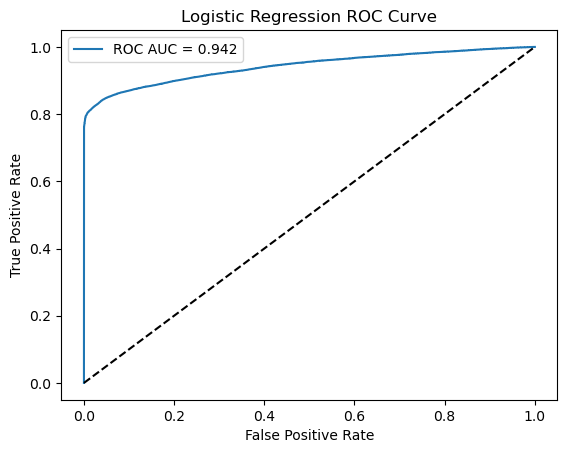

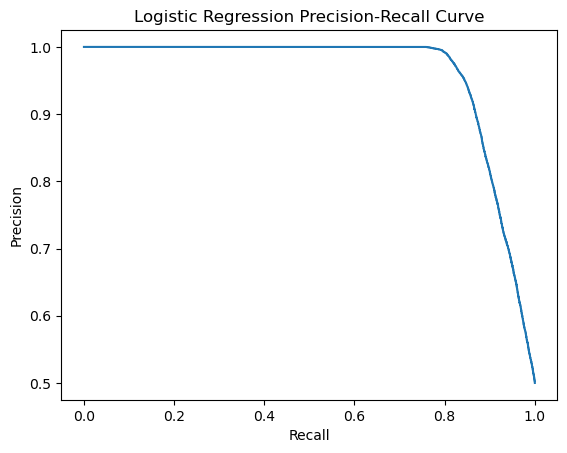

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     37983
           1       0.94      0.85      0.89     37982

    accuracy                           0.90     75965
   macro avg       0.90      0.90      0.90     75965
weighted avg       0.90      0.90      0.90     75965

ROC-AUC Score: 0.9417


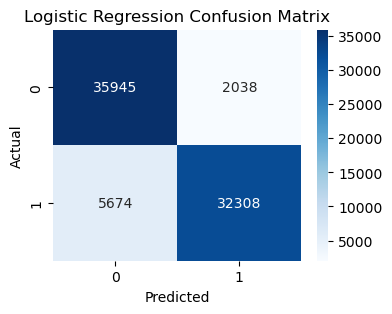

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load and preprocess data
data = pd.read_csv('Cleaned_Fraud.csv')
data = data.drop(columns=['Transaction_Date', 'Transaction_Time'])

X = data.drop(columns=['Is_Fraud'])
y = data['Is_Fraud']

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
scaler = StandardScaler()
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])

# Apply SMOTE
smote = SMOTE(random_state=3870)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Train Logistic Regression
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_test, y_proba):.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression Precision-Recall Curve')
plt.show()

# Evaluation
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

cm_log = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression achieved:

- **Accuracy:** 90%
- **Precision (Fraud):** 94%
- **Recall (Fraud):** 85%
- **ROC-AUC:** 0.94

SMOTE significantly enhanced performance by addressing class imbalance, allowing the model to detect fraud effectively while maintaining high precision.


### Random Forest

Random Forest was also applied to the SMOTE-balanced dataset. The model provided solid predictive performance along with insights into feature importance.


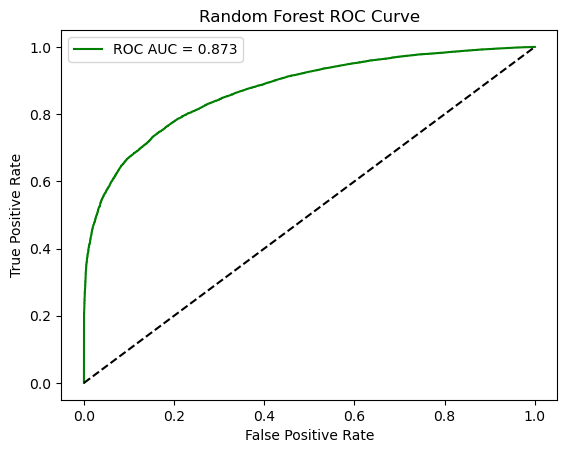

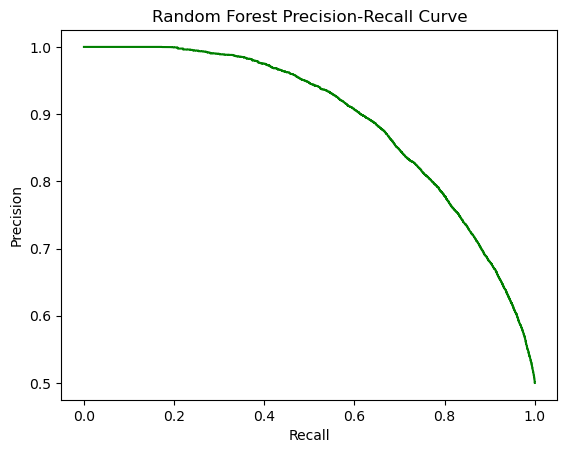

              precision    recall  f1-score   support

           0       0.78      0.80      0.79     37983
           1       0.79      0.78      0.79     37982

    accuracy                           0.79     75965
   macro avg       0.79      0.79      0.79     75965
weighted avg       0.79      0.79      0.79     75965

Random Forest ROC-AUC Score: 0.8730


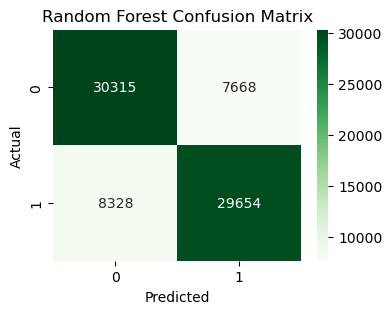

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='green', label=f'ROC AUC = {roc_auc_score(y_test, y_proba_rf):.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
plt.figure()
plt.plot(recall_rf, precision_rf, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve')
plt.show()


# Evaluation
print(classification_report(y_test, y_pred_rf))
print(f"Random Forest ROC-AUC Score: {roc_auc_score(y_test, y_proba_rf):.4f}")

# For Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4,3))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest achieved:

- **Accuracy:** 80%
- **Precision (Fraud):** 80%
- **Recall (Fraud):** 79%
- **ROC-AUC:** 0.88

The model performed well after SMOTE, though slightly below Logistic Regression in raw metrics. However, Random Forest offers additional value through feature importance analysis, key features identified were primarily related to transaction devices and amounts.


### XGBoost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve, fbeta_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load in data
xg_bank_fraud_df = pd.read_csv('Bank_Transaction_Fraud_Detection.csv')

#### Data Cleaning - (XGB Specific)

In [ ]:
# Format time and date to be usable
xg_bank_fraud_df['Transaction_Date'] = pd.to_datetime(xg_bank_fraud_df['Transaction_Date'], format='%d-%m-%Y', dayfirst=True)
xg_bank_fraud_df['Transaction_Time'] = pd.to_datetime(xg_bank_fraud_df['Transaction_Time'], format='%H:%M:%S', errors='coerce')

# Transaction_Date
xg_bank_fraud_df['Year'] = xg_bank_fraud_df['Transaction_Date'].dt.year
xg_bank_fraud_df['Month'] = xg_bank_fraud_df['Transaction_Date'].dt.month
xg_bank_fraud_df['Day'] = xg_bank_fraud_df['Transaction_Date'].dt.day
xg_bank_fraud_df['Weekday'] = xg_bank_fraud_df['Transaction_Date'].dt.weekday

# Transaction_Time
xg_bank_fraud_df['Hour'] = xg_bank_fraud_df['Transaction_Time'].dt.hour
xg_bank_fraud_df['Minute'] = xg_bank_fraud_df['Transaction_Time'].dt.minute

# Gender
xg_bank_fraud_df['Gender'] = xg_bank_fraud_df['Gender'].map({
    'Male' : 1, 'Female': 0
})

# Age
age_bins = [0, 25, 40, 60, 120]
labels = ['less25','26-40','41-60','60plus']
xg_bank_fraud_df['Age_Group'] = pd.cut(xg_bank_fraud_df['Age'], bins=age_bins, labels=labels)
xg_bank_fraud_df = pd.get_dummies(xg_bank_fraud_df, columns=['Age_Group'], prefix='AgeGrp')

# Account_Type
xg_bank_fraud_df['Account_Type'] = xg_bank_fraud_df['Account_Type'].map({
    'Savings' : 0, 'Business' : 1, 'Checking' : 2, 
})

# Transaction_Type
xg_bank_fraud_df['Transaction_Type'] = xg_bank_fraud_df['Transaction_Type'].map({
    'Transfer' : 0, 'Bill Payment' : 1, 'Debit' : 2, 'Withdrawal' : 3, 'Credit' : 4,
})

# Merchant_Category
xg_bank_fraud_df['Merchant_Category'] =  xg_bank_fraud_df['Merchant_Category'].map({
    'Restaurant' : 0, 'Groceries' : 1, 'Entertainment' : 2, 'Health' : 3, 'Clothing' : 4, 'Electronics' : 5, 
})

# Account_Balance
xg_bank_fraud_df['Amt_Trans_to_Bal_Ratio'] = xg_bank_fraud_df['Transaction_Amount'] / (xg_bank_fraud_df['Account_Balance'] + 1)

# Transaction_Description
keyword_flags = [
    'ATM','Bitcoin','Cryptocurrency','Online','Refund', 'POS','Transfer',
    'Subscription','Electronics','Gift','Charity','Rental','Taxi', 'Penalty', 'Pharmacy', 'Luxury'
    ]

for kw in keyword_flags:
    col_name = f'Desc_Has_{kw}'
    # Check if keyword exists (case-insensitive), handle NaN values
    xg_bank_fraud_df[col_name] = (
        xg_bank_fraud_df['Transaction_Description']
        .str.contains(kw, case=False, regex=False)
        .fillna(False)
        .astype(int)
    )

# Frequency encoding: State, City, Bank_Branch, Transaction_Device, Device_Type
# Included this type of encoding because of the number of unique values is a lot
for column in ['State', 'City', 'Bank_Branch', 'Transaction_Device', 'Device_Type']:
    freq_map = xg_bank_fraud_df[column].value_counts().to_dict()
    xg_bank_fraud_df[column] = xg_bank_fraud_df[column].map(freq_map)

# Getting rid of non categorical/informative variabless
xg_bank_fraud_df.drop(['Customer_Name', 'Transaction_ID', 'Transaction_Currency', 
                       'Transaction_Location', 'Customer_Contact', 'Customer_Email', 
                       'Customer_ID', 'Merchant_ID', 'Transaction_Date', 'Transaction_Time', 
                       'Transaction_Description'], 
                       axis=1, 
                       inplace=True)

#### Setting Up Data for Modeling

In [ ]:
# Is_Fraud is what we want to predict
y = xg_bank_fraud_df['Is_Fraud']
x = xg_bank_fraud_df.drop(['Is_Fraud'], axis=1)

# Found StandardScaler to standardize all numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Used smote for resampling, giving new synthetic rows to help even out fraud/non-fraud
smote = SMOTE(random_state=3870)
X_resampled, y_resampled = smote.fit_resample(x, y)

#Split data 80/20
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=3870, stratify=y_resampled)

#### Make and Fit the Model

In [ ]:
# Initialize model
xg_model = XGBClassifier(
    n_estimators=300,
    max_depth=12,
    learning_rate=0.1,
    eval_metric='logloss',
    subsample=0.7,
    scale_pos_weight=1, 
    random_state=3870
)

# Fit model
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=3870, ...)

#### Results

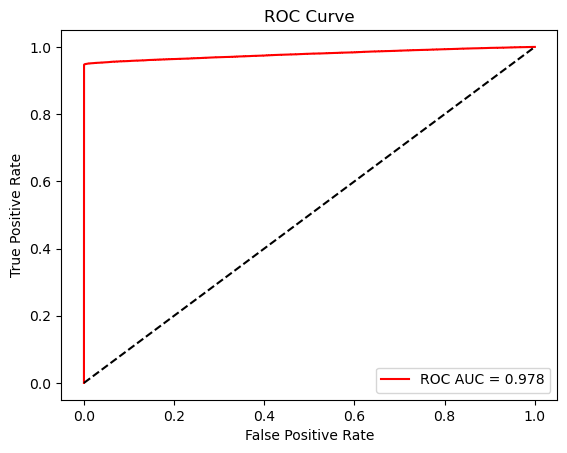

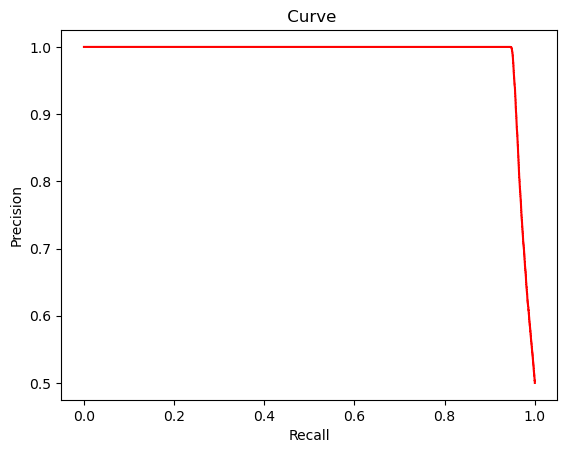

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37983
           1       1.00      0.95      0.97     37982

    accuracy                           0.97     75965
   macro avg       0.97      0.97      0.97     75965
weighted avg       0.97      0.97      0.97     75965



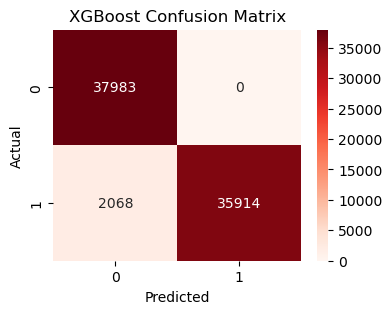

In [ ]:
# Find the optimal threshold for precision/recall curve
y_prob = xg_model.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, roc_th = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='red', label=f"ROC AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Plot Precision/Recall curve
precision, recall, threshold = precision_recall_curve(y_test, y_prob)
plt.figure()
plt.plot(recall, precision, color='red')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(" Curve")
plt.show()

valid = np.where(recall[:-1] >= 0.8)[0]
best_idx = valid[np.argmax(precision[valid])]
threshold = threshold[best_idx]

# Prediction w/ balanced_threshold
y_pred_optimized = (y_prob >= threshold).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred_optimized, zero_division=0))
# print("Confusion Matrix:")
# print(pd.crosstab(y_test, y_pred_optimized, 
#                  rownames=['Actual'], 
#                  colnames=['Predicted'], 
#                  margins=True))

cm_xgb = confusion_matrix(y_test, y_pred_optimized)
plt.figure(figsize=(4,3))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



#### XGBoost Summary

The initial XGBoost fraud detection went poorly, and had some significant limitations, only predicting slightly better than a random classifier. This initial model didn’t implement standardization or an effective balancing of fraud/non-fraud classes. I had attempted to use Customer_ID and Merchant_ID to identify patterns over time, or with specific merchants. But this was fruitless, with all IDs being unique.

To solve some of the major problems, standardization of data was done by StandardScaler, and resampling was done with SMOTE, which resamples the minority class (the known fraud transactions) by finding the k-nearest neighbors, and picks a random one, and does some math with it to create synthetic data that closely resembles the actual data, and essentially allowed for the model to get a better understanding of the fraud cases. These two methods weren’t taught in class, but after not standardizing, and using resample(), I did some research online to find those were applicable and useful methods.

Now, the XGBoost performs exceptionally. It predicts all non-frauds correctly, out of the ~38,000 instances, predicted no false positives. It predicts fraudulent transactions roughly 94.6% of the time.

## Summary and Conclusions

Through the various exploratory methods and visualizations employed, we expected to identify at least one predictor variable that would clearly indicate when a transaction was fraudulent. However, most visualizations revealed minimal discrepancies between fraudulent and non-fraudulent transactions. This initially led us to worry that our models would struggle to detect fraud effectively.

We began with **XGBoost**, but the initial version performed poorly due to significant class imbalance and ineffective sampling techniques that merely replicated existing fraud cases. Recognizing this issue, we applied **SMOTE** to generate synthetic fraud examples, giving the model a broader understanding of what constitutes fraudulent behavior.

Once SMOTE was implemented, not only did XGBoost improve dramatically, but we also tested **Logistic Regression** and **Random Forest** to compare performance across different model types. Surprisingly, **all models** benefited significantly from SMOTE, but XGBoost ultimately delivered the best results.

| **Model**            | **Accuracy** | **Precision (Fraud)** | **Recall (Fraud)** | **ROC-AUC** |
|----------------------|--------------|-----------------------|--------------------|-------------|
| Logistic Regression  | 90%          | 94%                   | 85%                | 0.942       |
| Random Forest        | 79%          | 79%                   | 78%                | 0.873       |
| **XGBoost**          | **97%**      | **100%**              | **95%**            | **0.978**   |

As shown in the table above, **XGBoost** achieved near-perfect precision and recall, outperforming the other models after proper balancing and threshold tuning. **Logistic Regression** also demonstrated strong performance, proving that simpler models can still be highly effective when paired with proper preprocessing. **Random Forest** offered reasonable results but lagged behind in both precision and recall.

A key takeaway from this project is that **handling class imbalance** was more critical than model complexity. Without SMOTE, none of these models would have performed well. Once balanced, even basic models like Logistic Regression became viable fraud detectors.

Additionally, in fraud detection, it's important to balance **recall** (catching as many fraudulent transactions as possible) with **precision** (avoiding false positives). Our best model, XGBoost, managed to achieve both — minimizing false positives while still detecting nearly all fraud cases.

---

## Limitations and Recommendations for Future Work

Our main issue with the dataset is that all transactions contain completely unique customer and merchant IDs, preventing us from identifying behavioral patterns over time. This limits real-world applicability, where tracking customer or merchant history is crucial for effective fraud detection. As a result, our models may not generalize well to new, real-world data.

Another consideration is the balance between precision and recall. While XGBoost achieved perfect precision, in some business contexts, it might be preferable to **prioritize recall**, even if it means accepting more false positives. This depends on a company's capacity for manual review and its tolerance for mistakenly flagging legitimate transactions.

For future work, we recommend:
- Incorporating **time-based data** or customer behavior history if available.
- Exploring **cost-sensitive learning** to better handle the trade-off between false positives and false negatives.
- Using **ensemble methods** to combine strengths of multiple models.
- Continuously retraining models to adapt to evolving fraud patterns.
- Testing on live or more dynamic datasets to assess real-world performance beyond synthetic balancing.
here